In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
df_fl_finalf = pd.read_csv('Final_data.csv')

In [3]:
df_fl_finalf.dtypes

Unnamed: 0                       int64
FISCAL_YEAR                      int64
FISCAL_PERIOD_NUMBER             int64
MERCHANT_CLASS                  object
PATTERN                          int64
SALE_QUANTITY                    int64
RETAIL_PRICE_AT_TRANSACTION    float64
Discount                       float64
P/S Ratio                      float64
dtype: object

In [4]:
df_fl_finalf.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
dummies = pd.get_dummies(df_fl_finalf[['MERCHANT_CLASS','PATTERN','FISCAL_YEAR','FISCAL_PERIOD_NUMBER']])

y = df_fl_finalf['P/S Ratio']

x_numerical = df_fl_finalf.drop(['MERCHANT_CLASS','PATTERN','FISCAL_YEAR','FISCAL_PERIOD_NUMBER','P/S Ratio' ], axis=1).astype('float64')

x = pd.concat([x_numerical, dummies], axis=1)
# dropping extra columns
#x= x.drop(['MERCHANT_CLASS','PATTERN','FISCAL_YEAR','FISCAL_PERIOD_NUMBER'],axis=1)

# concatation of independent variables and new cateorical variable.
#x=pd.concat([x,cats],axis=1)

In [6]:
list_numerical = x_numerical.columns
list_numerical

Index(['SALE_QUANTITY', 'RETAIL_PRICE_AT_TRANSACTION', 'Discount'], dtype='object')

In [7]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train[list_numerical]) 

x_train[list_numerical] = scaler.transform(x_train[list_numerical])

x_test[list_numerical] = scaler.transform(x_test[list_numerical])

<ipython-input-8-7278864b4aa9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[list_numerical] = scaler.transform(x_train[list_numerical])
/apps/spack/bell/external/learning/ml-toolkit/conda-2020.07-py38/cpu/install/caffe-1.0/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-8-7278864b4aa9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [9]:
# pip install xgboost

In [10]:
# import related packages
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# from xgboost import XGBRegressor


#import train_test_split from sklearn
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression, Ridge
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [12]:
y_prediction =  LR.predict(x_test)


In [13]:
# importing r2_score module
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',MSE(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(MSE(y_test,y_prediction)))
print('mean_absolute_error is==', MAE(y_test,y_prediction))

r2 score is 0.8286703479984725
mean_sqrd_error is== 250.61877990863974
root_mean_squared error of is== 15.830943746619774
mean_absolute_error is== 9.811206241051536


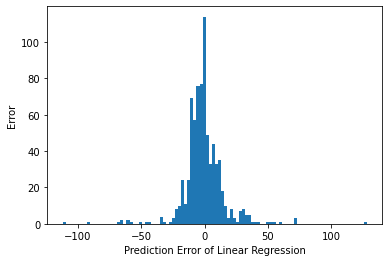

In [14]:
error = y_prediction - y_test
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error of Linear Regression")
_ = plt.ylabel("Error")

# Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import arange

In [16]:
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 10.172 (0.747)


In [17]:
from sklearn.model_selection import GridSearchCV
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -10.140
Config: {'alpha': 0.01}


# LASSO

In [18]:
from sklearn.linear_model import Lasso

In [19]:
reg = Lasso(alpha=1)
reg.fit(x_train, y_train)

Lasso(alpha=1)

In [20]:
print('R squared training set', round(reg.score(x_train, y_train)*100, 2))
print('R squared test set', round(reg.score(x_test, y_test)*100, 2))

R squared training set 78.37
R squared test set 80.3


In [21]:
# Training data
pred_train = reg.predict(x_train)
mse_train = MSE(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(x_test)
mse_test =MSE(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 301.74
MSE test set 288.11


In [22]:
# K fold CV
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=42, max_iter=10000)

# Fit model
model.fit(x_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=42)

In [23]:
model.alpha_

0.03215944382394799

In [24]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(x_train, y_train)

Lasso(alpha=0.03215944382394799)

In [25]:
print('R squared training set', round(lasso_best.score(x_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(x_test, y_test)*100, 2))

R squared training set 81.38
R squared test set 82.72


In [26]:
print('mean_sqrd_error is==',MSE(y_test, lasso_best.predict(x_test)))
print('root_mean_squared error of is==',np.sqrt(MSE(y_test, lasso_best.predict(x_test))))
print('mean_absolute_error is==', MAE(y_test, lasso_best.predict(x_test)))

mean_sqrd_error is== 252.72868029821186
root_mean_squared error of is== 15.897442570999017
mean_absolute_error is== 10.104661881673138


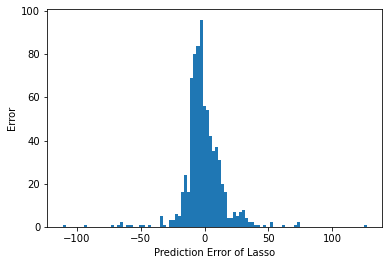

In [27]:
y_pred_lasso = lasso_best.predict(x_test)
error = y_pred_lasso - y_test
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error of Lasso")
_ = plt.ylabel("Error")

# SVM

In [28]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(x_train,y_train)
y_pred_svm=regressor.predict(x_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
mae=MAE(y_test, y_pred_svm)
mse=MSE(y_test, y_pred_svm)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', regressor.score(x_test,y_test))
print('R2 square:',r2_score(y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ',np.sqrt(mse))

Suppport Vector Regression Accuracy:  -0.1817689331405965
R2 square: -0.1817689331405965
MAE:  33.063987830237096
MSE:  1728.676178919633
RMSE:  41.57735175452656


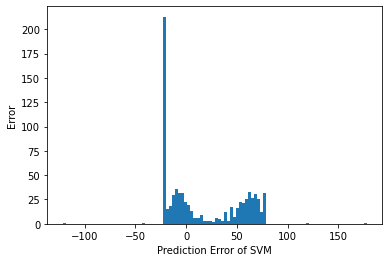

In [29]:
error = y_pred_svm - y_test
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error of SVM")
_ = plt.ylabel("Error")

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
dt_regressor = DecisionTreeRegressor(random_state = 42)
dt_regressor.fit(x_train,y_train)
#Predicting using test set 
y_pred = dt_regressor.predict(x_test)
mae=MAE(y_test, y_pred)
mse=MSE(y_test, y_pred)
# Printing the metrics
print('Decision Tree Regression Accuracy: ', dt_regressor.score(x_test,y_test))
print('R2 square:',r2_score(y_test, y_pred))
print('MAE: ', mae)
print('RMSE: ',np.sqrt(mse))
print('MSE: ', mse)

Decision Tree Regression Accuracy:  0.9219556203867073
R2 square: 0.9219556203867073
MAE:  4.722901580334827
RMSE:  10.684675960898494
MSE:  114.16230038940213


In [32]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(dt_regressor, x_train, y_train, cv=kfold)
print("Accuracy of Decision Tree: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy of Decision Tree: 86.19% (5.43%)


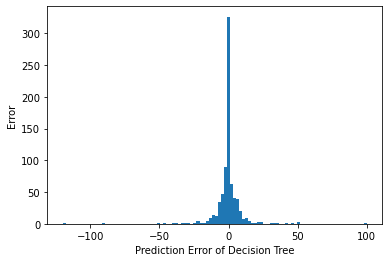

In [33]:
error = y_pred - y_test
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error of Decision Tree")
_ = plt.ylabel("Error")

# XGBoost

In [34]:
# explore lightgbm number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import xgboost as xg

## Explore Number of Trees

In [35]:
# get a list of models to evaluate
def get_models():
    models = dict()
    trees = [10, 50, 100, 500, 1000, 5000]
    for n in trees:
        models[str(n)] = xg.XGBRegressor(n_estimators=n)
    return models

In [36]:
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = KFold(n_splits=10, random_state=42)
    scores = cross_val_score(model, x_train, y_train, cv=kfold)
    return scores

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>10 0.885 (0.051)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>50 0.897 (0.072)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>100 0.910 (0.040)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>500 0.916 (0.045)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>1000 0.906 (0.048)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>5000 0.905 (0.054)


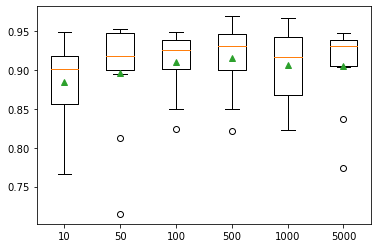

In [37]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Explore Tree Depth

In [38]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,11):
        models[str(i)] = xg.XGBRegressor(max_depth=i, num_leaves=2**i)
    return models

[23:34:48] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:34:48] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:48] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:48] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  bu

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:34:50] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:50] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:50] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  bu

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:34:51] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:52] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:52] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  bu

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:34:53] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:53] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:53] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  bu

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:34:55] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:55] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:55] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  bu

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:34:57] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:58] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:58] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  bu

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:35:00] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:00] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:01] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  bu

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:35:03] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:03] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:04] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  bu

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:35:06] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:07] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:07] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  bu

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:35:10] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:10] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:11] WARNING: ../src/learner.cc:576: 
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  bu

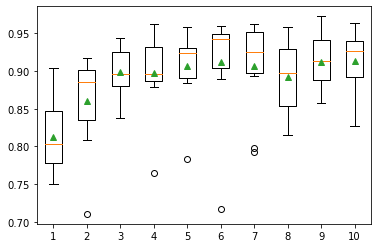

In [39]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Explore Learning Rate

In [40]:
# get a list of models to evaluate
def get_models():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = xg.XGBRegressor(learning_rate=r)
    return models

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>0.0001 -2.704 (0.397)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>0.0010 -2.128 (0.359)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>0.0100 0.371 (0.052)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>0.1000 0.904 (0.042)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>1.0000 0.889 (0.053)


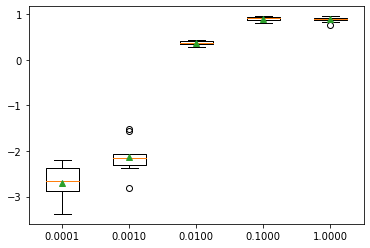

In [41]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Boosting Type

In [42]:
# get a list of models to evaluate
def get_models():
    models = dict()
    types = ['gbtree', 'gblinear', 'dart']
    for t in types:
        models[t] = xg.XGBRegressor(boosting_type=t)
    return models

[23:35:27] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:35:27] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:27] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:28] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being 

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:35:30] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:30] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:30] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being 

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:35:32] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:33] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:35:33] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being 

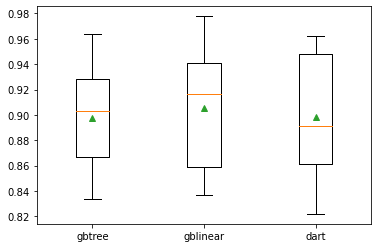

In [43]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Final Model

In [84]:
# using the XGBoost Model to predict net sale amount
# from sklearn.preprocessing import StandardScaler
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
n_estimators = 500, boosting_type='gblinear', learning_rate=0.1, max_depth=6, num_leaves=2**6, seed = 42)

# Fitting the model
xgb_r.fit(x_train, y_train)

# Predict the model
pred = xgb_r.predict(x_test)

[23:39:20] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:20] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [85]:
# Accuracy of the Model

# R2 score Computation
r2 = r2_score(y_test, pred)
print('R2 score of XGBoost : % f' %(r2))

# MSE Computation
mse = MSE(y_test, pred)
print("mean_sqrd_error of XGBoost : % f" %(mse))

# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("root_mean_sqrd_error of XGBoost : % f" %(rmse))

mae=MAE(y_test, pred)
print('MAE: ', mae)

R2 score of XGBoost :  0.910591
mean_sqrd_error of XGBoost :  130.785759
root_mean_sqrd_error of XGBoost :  11.436160
MAE:  4.905939376207634


In [86]:
# CV model
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(xgb_r, x_train, y_train, cv=kfold)
print("Accuracy of XGBoost: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[23:39:21] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:21] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:39:23] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:23] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting_type", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:39

In [87]:
import matplotlib.pyplot as plt

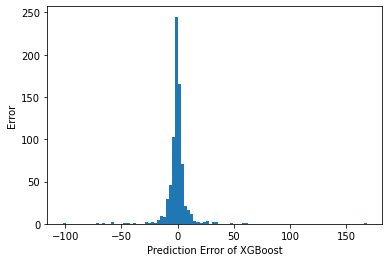

In [88]:
error = pred - y_test
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error of XGBoost")
_ = plt.ylabel("Error")

# Random Forest

In [49]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
RFmodel = RandomForestRegressor(n_estimators = 1000, max_depth = 6, bootstrap=True, random_state=42)
 
# fit the regressor with x and y data
RFmodel.fit(x_train, y_train)

pred =RFmodel.predict(x_test)

# Accuracy of the Model

# R2 score Computation
r2 = r2_score(y_test, pred)
print('R2 score of RF : % f' %(r2))

# MSE Computation
mse = MSE(y_test, pred)
print("mean_sqrd_error of RF : % f" %(mse))

# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("root_mean_sqrd_error of RF : % f" %(rmse))

mae=MAE(y_test, pred)
print('MAE: ', mae)

R2 score of RF :  0.893186
mean_sqrd_error of RF :  156.245677
root_mean_sqrd_error of RF :  12.499827
MAE:  7.492507277064948


In [50]:
# CV model
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(RFmodel, x_train, y_train, cv=kfold)
print("Accuracy of RF: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy of RF: 87.62% (3.07%)


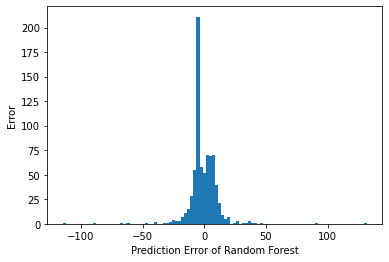

In [51]:
error = pred - y_test
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error of Random Forest")
_ = plt.ylabel("Error")

# Deep learning

In [52]:
train_stats = x_train.describe()
train_stats

,SALE_QUANTITY,RETAIL_PRICE_AT_TRANSACTION,Discount,PATTERN,FISCAL_YEAR,FISCAL_PERIOD_NUMBER,MERCHANT_CLASS_anklets,MERCHANT_CLASS_baby apparel/accessories,MERCHANT_CLASS_baby bags,MERCHANT_CLASS_backpacks,...,MERCHANT_CLASS_satchels,MERCHANT_CLASS_sleepwear,MERCHANT_CLASS_swimwear,MERCHANT_CLASS_textiles,MERCHANT_CLASS_tops,MERCHANT_CLASS_totes,MERCHANT_CLASS_travel bags,MERCHANT_CLASS_travel/packing accessories,MERCHANT_CLASS_wallets,MERCHANT_CLASS_wristlets
count,1.779000e+03,1.779000e+03,1.779000e+03,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,...,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,2.711200e-17,-2.262259e-17,-1.605034e-17,0.624508,2020.481169,6.465430,0.005621,0.000562,0.040472,0.037099,...,0.037662,0.037099,0.013491,0.037099,0.002811,0.034851,0.038786,0.036537,0.036537,0.038224
std,1.000281e+00,1.000281e+00,1.000281e+00,0.484386,1.130943,3.412132,0.074784,0.023709,0.197119,0.189059,...,0.190430,0.189059,0.115396,0.189059,0.052955,0.183454,0.193138,0.187676,0.187676,0.191790
min,-5.473127e-01,-1.475622e+00,-7.156946e-02,0.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.025513e-01,-7.289776e-01,-6.185484e-02,0.000000,2019.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.461363e-01,-3.205419e-01,-6.140919e-02,1.000000,2020.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.327571e-02,3.437419e-01,-6.087265e-02,1.000000,2022.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.207616e+01,4.424738e+00,2.177964e+01,1.000000,2022.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
pip install git+https://github.com/tensorflow/docs

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-kan73uic
  Using cached protobuf-3.19.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=171369 sha256=3fb314afcb1d1b575173e0fdd3f684c577e7e0ce57b0265399c034280909a61e
  Stored in directory: /tmp/pip-ephem-wheel-cache-_zgvfa58/wheels/3b/ee/a2/ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-cpu 2.3.0 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
tensorflow-cpu

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LayerNormalization, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from numpy.random import seed

In [55]:
def build_model():
    model= keras.Sequential([
    layers.Dense(16,kernel_initializer='normal', activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='linear')
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [56]:
model = build_model()

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                800       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 945
Trainable params: 945
Non-trainable params: 0
_________________________________________________________________


In [58]:
EPOCHS = 1000

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_data=(x_test,y_test), verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1541.8065,  mae:35.7329,  mse:1541.8065,  val_loss:1460.4398,  val_mae:34.6897,  val_mse:1460.4398,  
....................................................................................................
Epoch: 100, loss:477.4776,  mae:16.8807,  mse:477.4776,  val_loss:495.9660,  val_mae:15.5676,  val_mse:495.9660,  
....................................................................................................
Epoch: 200, loss:329.5808,  mae:12.8901,  mse:329.5808,  val_loss:274.2201,  val_mae:10.9881,  val_mse:274.2201,  
....................................................................................................
Epoch: 300, loss:303.5121,  mae:12.1560,  mse:303.5121,  val_loss:240.1657,  val_mae:9.5092,  val_mse:240.1657,  
....................................................................................................
Epoch: 400, loss:290.0988,  mae:11.7306,  mse:290.0988,  val_loss:274.5078,  val_mae:11.1336,  val_mse:274.5078,  
...................

In [59]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,205.757736,9.022398,205.757736,215.023102,9.297311,215.023102,995
996,209.555222,9.219296,209.555222,210.065872,8.891095,210.065872,996
997,198.786270,8.774396,198.786270,365.938416,14.952826,365.938416,997
998,203.006119,8.800438,203.006119,409.266632,15.880253,409.266632,998
999,208.698959,9.131569,208.698959,199.603546,8.357649,199.603546,999


In [60]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Quantity]')

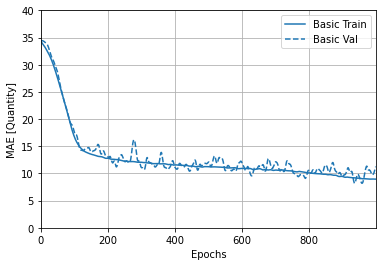

In [61]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 40])
plt.ylabel('MAE [Quantity]')

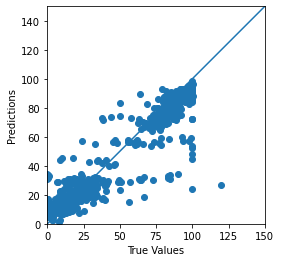

In [62]:
test_predictions = model.predict(x_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 150]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

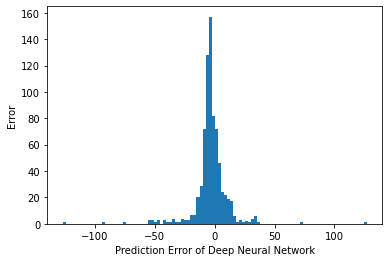

In [63]:
error = test_predictions - y_test
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error of Deep Neural Network")
_ = plt.ylabel("Error")

In [64]:
mae=MAE(y_test, test_predictions)
mse=MSE(y_test, test_predictions)
rmse = np.sqrt(MSE(y_test, test_predictions))
# Printing the metrics
#print('Suppport Vector Regression Accuracy: ', lin_reg_pl.score(x_poly,y_train))
print('R2 square:',r2_score(y_test, test_predictions))
print('MAE: ', mae)
print('MSE: ', mse)
print("RMSE: % f" %(rmse))

R2 square: 0.863545708174279
MAE:  8.3576493272431
MSE:  199.60355800147642
RMSE:  14.128112


# Neural Network

In [65]:
from sklearn.neural_network import MLPRegressor

In [66]:
# Neural Network model
NNmodel = MLPRegressor(solver='lbfgs', max_iter=5000, hidden_layer_sizes=(6, 5), random_state=0)

#train model
NNmodel.fit(x_train, y_train)
y_pred_NN = NNmodel.predict(x_test)

In [67]:
score=r2_score(y_test,y_pred_NN)
print('r2 score is',score)
print('mean_sqrd_error is==',MSE(y_test,y_pred_NN))
print('root_mean_squared error of is==',np.sqrt(MSE(y_test,y_pred_NN)))
print('mean_absolute_error is==', MAE(y_test,y_pred_NN))

r2 score is 0.8196666308624239
mean_sqrd_error is== 263.7892998794554
root_mean_squared error of is== 16.241591667058234
mean_absolute_error is== 10.732788314191271


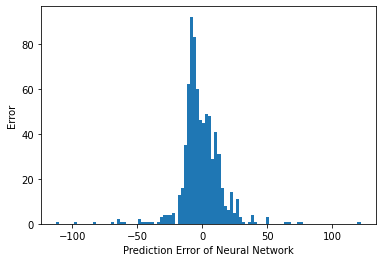

In [68]:
error = y_pred_NN - y_test
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error of Neural Network")
_ = plt.ylabel("Error")

# LightGBM

In [69]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [70]:
# check lightgbm version
import lightgbm
print(lightgbm.__version__)

3.3.2


In [71]:
# explore lightgbm number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor
from matplotlib import pyplot

## Explore Number of Trees

In [72]:
# get a list of models to evaluate
def get_models():
    models = dict()
    trees = [10, 50, 100, 500, 1000, 5000]
    for n in trees:
        models[str(n)] = LGBMRegressor(n_estimators=n)
    return models

In [73]:
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = KFold(n_splits=10, random_state=42)
    scores = cross_val_score(model, x_train, y_train, cv=kfold)
    return scores

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>10 0.750 (0.033)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>50 0.873 (0.040)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>100 0.882 (0.046)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>500 0.878 (0.047)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>1000 0.873 (0.063)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>5000 0.874 (0.037)


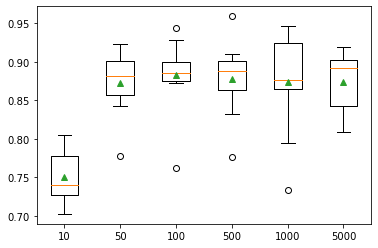

In [74]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Explore Tree Depth

In [75]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,11):
        models[str(i)] = LGBMRegressor(max_depth=i, num_leaves=2**i)
    return models

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>1 0.803 (0.046)
>2 0.840 (0.041)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>3 0.856 (0.058)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>4 0.862 (0.045)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>5 0.870 (0.019)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>6 0.870 (0.042)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>7 0.867 (0.039)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>8 0.874 (0.043)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>9 0.871 (0.034)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>10 0.882 (0.042)


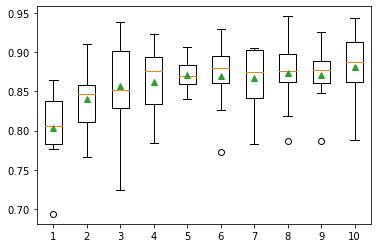

In [76]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Explore Learning Rate

In [77]:
# get a list of models to evaluate
def get_models():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = LGBMRegressor(learning_rate=r)
    return models

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>0.0001 0.005 (0.017)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>0.0010 0.150 (0.010)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>0.0100 0.745 (0.027)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>0.1000 0.881 (0.029)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>1.0000 0.831 (0.056)


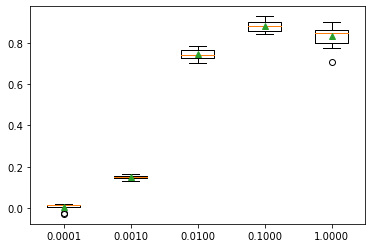

In [78]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Boosting Type

In [79]:
# get a list of models to evaluate
def get_models():
    models = dict()
    types = ['gbdt', 'dart', 'goss']
    for t in types:
        models[t] = LGBMRegressor(boosting_type=t)
    return models

/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>gbdt 0.880 (0.044)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>dart 0.828 (0.049)


/apps/spack/bell/apps/anaconda/2020.11-py38-gcc-4.8.5-nhzhrm2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


>goss 0.858 (0.065)


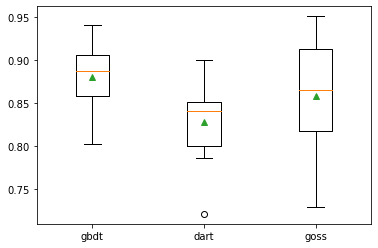

In [80]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Final model

In [81]:
# define the model
model = LGBMRegressor(n_estimators=500, max_depth=10, num_leaves=2**10, learning_rate=0.1, boosting_type='gbdt')
# fit the model on the whole dataset
model.fit(x_train, y_train)
yhat = model.predict(x_test)

In [82]:
# Accuracy of the Model

# R2 score Computation
r2 = r2_score(y_test, yhat)
print('R2 score of LightGBM : % f' %(r2))

# MSE Computation
mse = MSE(y_test, yhat)
print("mean_sqrd_error of LightGBM : % f" %(mse))

# RMSE Computation
rmse = np.sqrt(MSE(y_test, yhat))
print("root_mean_sqrd_error of LightGBM : % f" %(rmse))

mae=MAE(y_test, yhat)
print('MAE: ', mae)

R2 score of LightGBM :  0.893463
mean_sqrd_error of LightGBM :  155.841109
root_mean_sqrd_error of LightGBM :  12.483634
MAE:  6.199411362098471


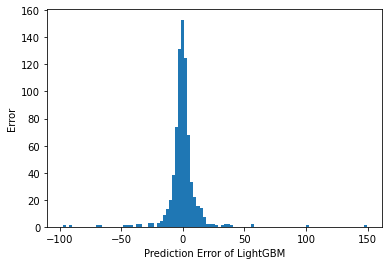

In [83]:
error = yhat - y_test
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error of LightGBM")
_ = plt.ylabel("Error")